In [1]:
from numpy import eye, linalg, arange, sqrt, diag, sin, pi, linspace, heaviside, sum as npsum, multiply, conjugate, real, array, zeros, copy
import matplotlib.pyplot as plt

In [2]:
# funcaozinha para inserir o range do eixo x, autovalores, autovetores e o numero de energias desejado na visualização; possivel inserir potencial para plotar junto
def plotEnPsi_finite_diff(x_values, en, psi, n, scale,ymin,ymax, potential):
    plt.plot(x_values, potential, c="C1140")
    for j in range(n):
        plt.hlines(
            en[j],
            xmin=x_values[0],
            xmax=x_values[-1],
            colors="C" + str(j),
            linestyles="--",
        )
        plt.plot(x_values, en[j] + scale * psi[:, j],  c="C" + str(j))
        y_min, y_max = (ymin, ymax)
        plt.ylim(y_min, y_max)
    plt.show()

In [3]:
n_2dmu = []

In [5]:
# PARAMETROS DO SISTEMA
h_bar=1 #planck reduzida
m = 0.067 #massa efetiva para GaAs na eq. de Schrödinger
L = 800  # tamanho do sistema
Ry = 26 #eV é a unidade de Energia
a0 = 0.05 #nm é a unidade de distância
h_bar2_m0 = Ry * a0**2
e2 = Ry * a0
k = 13 #constante dielétrica na eq. de Poisson
n2D = 5*10**(-5) #a.u. densidade experimentais

# parametros do poco (GaAs)
xmin_poco = 0.25 * L #a.u. parede do poço
xmax_poco = 0.75 * L #a.u. parede do poço
V_0_poco = 0.01 #a.u. profundidade do poço quadrado

# parametros do tempero
f = 0.1

# parâmetros de convergência
epsilon = 0.0001 

# DISCRETIZAÇÃO E INTERVALO ABSCISSAS
N=1000 #Numero de pontos na rede
dx = L/(N+1)  # discretização> dx = L/N+1 => N = (L/dx) - 1
x = arange(0, N)*dx

# parametros iniciais no ciclo de autoconsistência
V_h_inicial = zeros(N)
n_3d_loop = zeros(N)



In [103]:
mu_x = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# dopagem (0 representa o fundo do poço)
mu = mu_x[9] # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

# para ver a convergência da energia
enrg_inte_1 = []
enrg_inte_2 = []

In [104]:
# LAPLACIANO 1D DISCRETIZADO
laplaciano = lambda dx,N: -(1 / (dx ** 2)) * (2 * eye(N) - eye(N, k=-1) - eye(N, k=1))
energia_cinetica = lambda m: -(0.5/m)*laplaciano(dx,N)

In [105]:
# DEFINIÇÃO DO POTENCIAL ESTRUTURAL
poco_quadrado_finito = (
    lambda profundidade, xmin, xmax, x: -profundidade
    * heaviside(  # somar profundidade apenas para deixar o fundo do poço = 0
        x - xmin, 1
    )
    * heaviside(xmax - x, 1)
    + profundidade
)   

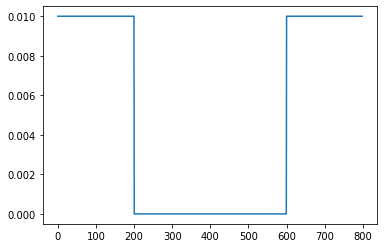

In [106]:
# POTENCIAIS
# scale = 2
V_poco_quadrado_finito = poco_quadrado_finito(
    profundidade=V_0_poco, xmin=xmin_poco, xmax=xmax_poco, x=x
)
V_hartree = lambda n_3d, k, dx, N: linalg.solve(laplaciano(dx, N), (-4*pi/k)*n_3d)
V_hartree_temperado = lambda tempero, V_1, V_3: f*V_3 + (1-f)*V_1
V_total = lambda V_estrutural, V_interacao: V_estrutural + V_interacao 
plt.plot(x, V_poco_quadrado_finito)
plt.show()


In [107]:
# E0_mu (soma de níveis ocupados)
E0_mu = lambda mu, E0_list: npsum(E0_list, where=E0_list<mu)
# Numero de níveis ocupados 
N_levels = lambda mu, E0_list: npsum(E0_list<mu)
# D.O.L 3D
def n_3d(phi_list, E0_list, mu, m): 
  vectors = array([(m*(mu-E0_list[j])/(2*pi*h_bar**2))*(conjugate(phi_list[j])*phi_list[j]) for j in range(N_levels(mu, E0_list))])
  if N_levels(mu, E0_list) > 1:
    return npsum(vectors, axis=0)
  elif N_levels(mu, E0_list) == 1:
    return vectors[0]
  return zeros(N)
# D.O.L 2D
n_2d_params = lambda mu, m, E0_list: [npsum(E0_list<mu)*m/(2*pi*h_bar**2),-E0_mu(mu, E0_list)] #retorna os coeficientes linear e angular, n_2d_params[0]==a e n_2d_params[1]==b

In [108]:
# O HAMILTONIANO
H = lambda V_efetivo, m: energia_cinetica(m) + diag(
    V_efetivo
)

Numero de niveis ocupados antes do loop 84
Energias ocupadas antes do loop [0.06048494 0.06111607 0.0962783  0.0969719  0.12426994 0.12674939
 0.14820692 0.15244815 0.16927856 0.17473861 0.1879055  0.19421373
 0.20297223 0.20987973 0.21571827 0.22253995 0.22920062 0.23589155
 0.24032533 0.24660002 0.25055392 0.25595832 0.25886316 0.26269394
 0.26617166 0.27056333 0.27537261 0.28065556 0.28637706 0.29243977
 0.29873912 0.30526232 0.31209583 0.31931207 0.32685871 0.33460989
 0.34253    0.35071786 0.35926528 0.3681179  0.37714764 0.38634174
 0.39581699 0.4056389  0.41571604 0.42594254 0.43636444 0.44710101
 0.45815038 0.4693912  0.48078376 0.49243161 0.50440567 0.51662421
 0.52899284 0.54156418 0.55444312 0.56760545 0.58094082 0.59444598
 0.60822607 0.62230831 0.63659469 0.65103759 0.66572148 0.68070938
 0.69593049 0.7113094  0.72690073 0.74278682 0.75892854 0.77523816
 0.79173929 0.80852006 0.8255712  0.84280445 0.86021585 0.87788975
 0.89584177 0.91399103 0.93231147 0.95087758 0.9697240

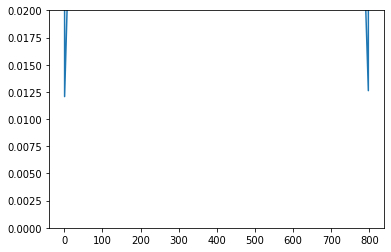

iter= 1
Numero de niveis ocupados 8
Energias ocupadas [0.35000352 0.35669968 0.58746345 0.60259816 0.77959587 0.80125826
 0.94736425 0.97347741]
iter= 2
Numero de niveis ocupados 8
Energias ocupadas [0.3369     0.34235376 0.56508376 0.57773508 0.74952935 0.76779945
 0.91049294 0.93264352]
iter= 3
Numero de niveis ocupados 8
Energias ocupadas [0.32591598 0.33017731 0.54624369 0.55658878 0.72416684 0.73936307
 0.8793584  0.89798878]
iter= 4
Numero de niveis ocupados 9
Energias ocupadas [0.31675073 0.31988709 0.53045268 0.53868195 0.70286428 0.71530576
 0.85318104 0.86871753 0.98884015]
iter= 5
Numero de niveis ocupados 10
Energias ocupadas [0.30919182 0.31127873 0.51736415 0.52366941 0.68516658 0.69516035
 0.83140957 0.84425113 0.96337325 0.97866086]
iter= 6
Numero de niveis ocupados 10
Energias ocupadas [0.30317357 0.3042867  0.50687496 0.51144133 0.67094032 0.67877577
 0.81388222 0.8244003  0.9428568  0.95579474]
iter= 7
Numero de niveis ocupados 10
Energias ocupadas [0.29843752 0.2986

In [109]:
# Primeira vez que foi executado o programa:
V_1 = V_h_inicial
V_3 = V_hartree(n_3d_loop, k, dx, N)
V_temperado = V_hartree_temperado(0, V_1, V_3)
V_efetivo = V_total(V_poco_quadrado_finito, V_temperado)
# acrescentando o potencial "infinito" nas bordas 
# TODO>>> irrelevante?
V_efetivo[0] = 1000
V_efetivo[-1] = 1000
# diagonalização
E0_list, phi_list = linalg.eigh(H(V_efetivo,m))
N_ocupados = N_levels(mu, E0_list)
print("Numero de niveis ocupados antes do loop", N_ocupados)
print("Energias ocupadas antes do loop", E0_list[:N_ocupados])

# teste de consistência para ver as energias do poço
plotEnPsi_finite_diff(x, E0_list, phi_list, N_ocupados, 0.05,0, 0.02, V_efetivo)

n_3d_loop = n_3d(phi_list, E0_list, mu, m)
n_2d_loop = n_2d_params(mu, m, E0_list)
# print("formato n3d antes loop =>", n_3d_loop.shape)
# obtendo energias e estados
# E0, phi_list = linalg.eigh(H)

# Loop de autoconsistência:
convergiu = False
cont_inte = []
iteracao=1
while not convergiu:
  print("iter=", iteracao)
  cont_inte.append(iteracao) #                       Pegando o cont_inte <------- aqui
  V_3 = V_hartree(n_3d_loop, k, dx, N)
  V_temperado = V_hartree_temperado(f, V_temperado, V_3)
  V_efetivo = V_total(V_poco_quadrado_finito, V_temperado)
  # acrescentando o potencial "infinito" nas bordas
  V_efetivo[0] = 1000
  V_efetivo[-1] = 1000
  # diagonalização
  E0_list, phi_list = linalg.eigh(H(V_efetivo,m))
  N_ocupados = N_levels(mu, E0_list)
  print("Numero de niveis ocupados",N_ocupados)
  print("Energias ocupadas", E0_list[:N_ocupados])
  enrg_inte_1.append(E0_list[0]) # Pegando o enrg_inte <------- aqui
  enrg_inte_2.append(E0_list[1]) # Pegando o enrg_inte <------- aqui
  n_3d_loop_novo = n_3d(phi_list, E0_list, mu, m)
  # print("n_3d_loop_novo", n_3d_loop_novo)
  # n_3d_loop_novo = n_3d_loop_novo if n_3d_loop_novo.size != N else zeros(N)
  n_2d_loop_novo = n_2d_params(mu, m, E0_list)
  
  # teste convergencia STD!!
  if (abs((n_2d_loop_novo[0] - n_2d_loop[0])/n_2d_loop[0])<epsilon) and (abs((n_2d_loop_novo[1] - n_2d_loop[1])/n_2d_loop[1])<epsilon):
    # se convergiu
    print("convergiu!")
    n_2dmu.append(n_2d_loop_novo)
    convergiu=True
  else:
    # se nao convergiu
    # print("formato V_1 novo", V_1.shape)
    n_2d_loop = copy(n_2d_loop_novo)
    n_3d_loop = copy(n_3d_loop_novo)
    iteracao+=1

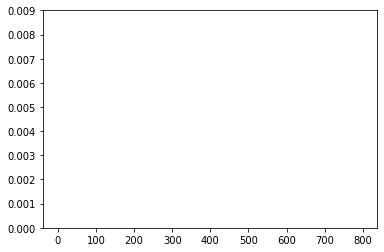

In [110]:
plotEnPsi_finite_diff(x, E0_list, phi_list, N_ocupados, 0.03, 0.0, 0.009, V_efetivo)

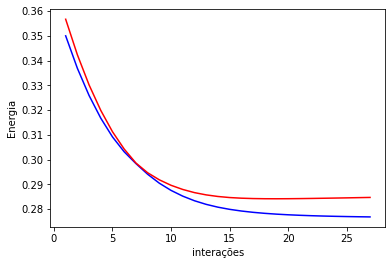

In [111]:
cont_inte = array(cont_inte)
enrg_inte_1 = array(enrg_inte_1)
enrg_inte_2 = array(enrg_inte_2)

plt.plot(cont_inte, enrg_inte_1, color='blue')
plt.plot(cont_inte, enrg_inte_2, color='red')
plt.xlabel("interações")
plt.ylabel("Energia")
plt.show()

In [114]:
n_2d_y = []
for i in range(len(mu_x)):
    f = n_2dmu[i][0]*mu_x[i] + n_2dmu[i][1]
    n_2d_y.append(f)
n_2d_y = array(n_2d_y)

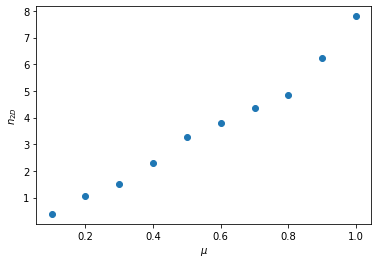

In [116]:
plt.scatter(mu_x, -n_2d_y)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$n_{2D}$')
plt.show()